# Introduction to Jupyter
## A Python environment for data science

This short notebook will provide an introduction to several of the core functionalities of Jupyter notebooks.

* numpy: Matrix algebra and numerical methods.
* pandas: Data frames for manipulating and visualising data as tables.
* matplotlib: Everybody's favourite Python plotting library.
* seaborn: Statistical visualisation library built on matplotlib and pandas. Lots of high-level functions for data visualisation.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(context='notebook', style='white', font_scale=1.8)

In [2]:
%matplotlib inline

## Using existing code within a notebook

We can import a .py file as a module as usual:

In [3]:
import plotting

Or, we can run the contents of a .py file in a cell:

In [4]:
%run plotting.py

We can use all our usual IPython commands to explore our code:

In [5]:
plotting.draw_confusion_matrix?

Signature:
plotting.draw_confusion_matrix(
    y_true,
    y_predicted,
    class_labels=None,
    ax=None,
)
Docstring:
Draws a confusion matrix for classifier predictions.

Args:
    y_true (array-like): True class labels
    y_predicted (array-like): Predicted class labels
    class_labels (dict-like, optional): Specify alternative names for each class to use for axis labels
    ax (Matplotlib.Axes, optional): The axes on which to draw the confusion matrix
    
Returns:
    ax (Matplotlib.Axes): The axes containing the confusion matrix.
File:      c:\users\fergus\documents\github_projects\reproducible-computational-workflows\3-jupyter\plotting.py
Type:      function


If we want to build on existing code, we can load the contents of a .py file into a cell. We can then save our changes if we want to modify the original file.

Let's try this with the file `utils.py`:

In [7]:
%load utils.py

In [8]:
%%time
print(foo())

bar
Wall time: 0 ns


## Data exploration

For the purposes of this example notebook, let's create some data from scratch using numpy. In practice you'd probably want to load in data from a file.

In [95]:
type(height[0])

numpy.float32

In [56]:
np.random.seed(42)

sample_size = 20

heights = np.random.normal(1.70, 0.1, sample_size).astype(np.float32)
weights = np.random.normal(75, 10, sample_size)
ages = np.random.uniform(18, 60, sample_size)

eye_colours = np.array(["Blue", "Brown", "Green", "Other"])
eyes = np.random.choice(eye_colours, sample_size)

Let's convert our data into a dataframe using Pandas. Jupyter renders dataframes as nice tables, allowing us to look at our data as soon as we load it.

In [57]:
all_data = pd.DataFrame({"Height": heights, "Weight": weights, "Age": ages, "Eye colour": eyes})

In [59]:
all_data.head()

,Height,Weight,Age,Eye colour
0,1.749671,89.656488,58.722554,Other
1,1.686174,72.742237,50.555579,Blue
2,1.764769,75.675282,57.458956,Other
3,1.852303,60.752518,55.582749,Other
4,1.676585,69.556173,43.111799,Other


Many of the plotting functions available through seaborn can operate directly on a pandas dataframe and use the row and column names to automatically annotate the plot. This is a very powerful way to rapidly visualise data during the exploration stage. Here we create a bar plot of the number of examples of each eye colour in the data set.

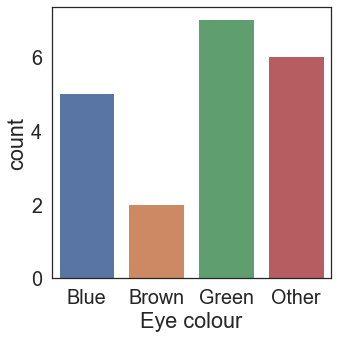

In [50]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))
sns.countplot(data=all_data, x='Eye colour', order=eye_colours, ax=ax)

Let's now look at another plot, combining two of the features, eye colour and height, in the same plot.

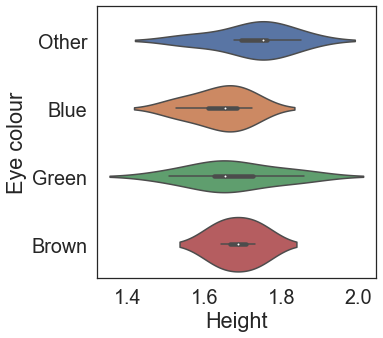

In [60]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))
sns.violinplot(data=all_data, y='Eye colour', x='Height', ax=ax)